<a href="https://colab.research.google.com/github/ljishen/my-notebooks/blob/master/Analysis_of_Possibility_of_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will analyze the possibility of failure for each of the following two deployments. The first deployment uses general-purpose servers to build edge storage systems while the second deployment uses Eusocial Storage Devices to build edge storage systems.

![alt text](https://docs.google.com/drawings/d/e/2PACX-1vSLUfHP-I2tvNaqcGzScy3mtlImrJ3OF3QUrfeGrdir7SF_VIksoJaIg--3bI2Zj5noH1jk3-kyHj-w/pub?w=838&h=518)

Suppose we use the following symbols for our mathematical analysis:

| Name |                 Description
|:----:|:-------------------------------------------|
|   $ \boldsymbol{m} $  | the number of GP servers in the storage system |
|   $ \boldsymbol{m}^{'} $  | the number of Eusocial Storage Devices in the storage system |
|   $ \boldsymbol{n} $  | the number of storage devices in a GP server   |
|   $ \boldsymbol{P_{m}} $  | the possibility of failure of components except the storage devices in a GP server  |
|   $ \boldsymbol{P_{d}} $  | the possibility of failure of a storage device in a GP server  |
|   $ \boldsymbol{P_{m}^{'}} $  | the possibility of failure of components except the storage devices in a Eusocial Storage Device  |
|   $ \boldsymbol{P_{d}^{'}} $  | the possibility of failure of a storage device in a Eusocial Storage Device  |

for simplicity, we have the following two categories of assumptions:

> **System Configuration Assumptions**
1. The deployment units are homogeneous. In other words, the GP servers are using the same hardware configuration, and the Eusocial Storage Devices are the same model.
1. These two deployments use the state-of-the-art **3-ways replication** for data protection.
1. Data are evenly distributed so that a failure of any two storage devices from two different failure domains will result in data loss, causing the unavailability of the storage system.

> **Parameters Assumptions**
1. $ \boldsymbol{P_m} = \boldsymbol{P_m^{'}} $ and $ \boldsymbol{P_d} = \boldsymbol{P_d^{'}} $. Though many literatures suggest that $ \boldsymbol{P_m} $ would be much greater than $ \boldsymbol{P_m^{'}} $ given the much more complex system design of GP servers. However, with this assumption we can produce a conservative result that creates a baseline of possibility of failure from our analysis.
1. $ \boldsymbol{P_d} = f \cdot \boldsymbol{P_m} $, where $ f > 0 $. The actual $ f $ depends on the type of storage devices in use. For hard drives, $ f $ could be greater than 2. While for solid-state drives, $ f $ could be less than 1. We call $ f $ the **ratio of failure rates**.
1. $ \boldsymbol{m^{'}} = c \cdot \boldsymbol{m} $, where $ c >= 1 $. Because a Eusocial Storage Device is in general less computing capable than a GP server due to the limited available space in their form factors to package abundant computing resources. We call $ c $ the **ratio of computing performance**.
1. $ \boldsymbol{n} = s \cdot \boldsymbol{m} $, where $ s >= 2 $. Each GP server has $ r $ storage devices in it. We call $ s $ the **ratio of storage performance**.
1. $ \boldsymbol{m} >= 3 $. Because 3-way replication requires at least 3 separate failure domains, which needs 3 servers.
1. Each Eusocial Storage Device is built with one storage device and some extra computing resources.

Given the symbols above,  we can express the possibility of failure $ \boldsymbol{P_{gp}} $ for the storage system built with GP servers:

> $ \boldsymbol{P_{gp}} = \mathrm{C}_\boldsymbol{m}^2 \cdot {\boldsymbol{P_m}}^2 + \mathrm{C}_{\boldsymbol{m} \cdot \boldsymbol{n}}^2 \cdot {\boldsymbol{P_d}}^2 - \boldsymbol{m} \cdot \mathrm{C}_\boldsymbol{n}^2 \cdot {\boldsymbol{P_d}}^2 $

The first term represents the possibility of failure of any two GP servers. The second term represents the possibility of failure of any two storage devices in the storage system. According to our assumption, a failure of two storage devices belonging to the same failure domain does not lead to data loss. Therefore, the third term subtracts the possibilities from these cases.

On the other hand, the possibility of failure $ \boldsymbol{P_{esd}} $ for the storage system built with Eusocial Storage Devices can be expressed as follows:

> $ \boldsymbol{P_{esd}} = \mathrm{C}_\boldsymbol{m^{'}}^2 \cdot {\boldsymbol{P_m^{'}}}^2 + \mathrm{C}_\boldsymbol{m^{'}}^2 \cdot {\boldsymbol{P_d^{'}}}^2 $

Since we assume $ \boldsymbol{P_m} = \boldsymbol{P_m^{'}} $ and $ \boldsymbol{P_d} = \boldsymbol{P_d^{'}} $, the equation can be rewritten as

> $ \boldsymbol{P_{esd}} = \mathrm{C}_\boldsymbol{m^{'}}^2 \cdot {\boldsymbol{P_m}}^2 + \mathrm{C}_\boldsymbol{m^{'}}^2 \cdot {\boldsymbol{P_d}}^2 =
 \mathrm{C}_\boldsymbol{m^{'}}^2 \cdot ({\boldsymbol{P_m}}^2 + {\boldsymbol{P_d}}^2) $

To evaluate the benefit of the reduction of the failure domain that Eusocial Storage Devices can bring about, we want to calculate the radio between $ \boldsymbol{P_{gp}} $ and $ \boldsymbol{P_{esd}} $:

> \begin{align*}
\frac{\boldsymbol{P_{gp}}}{\boldsymbol{P_{esd}}}
&= \frac{\mathrm{C}_\boldsymbol{m}^2 \cdot {\boldsymbol{P_m}}^2 + \mathrm{C}_{\boldsymbol{m} \cdot \boldsymbol{n}}^2 \cdot {\boldsymbol{P_d}}^2 - \boldsymbol{m} \cdot \mathrm{C}_\boldsymbol{n}^2 \cdot {\boldsymbol{P_d}}^2}{\mathrm{C}_\boldsymbol{m^{'}}^2 \cdot ({\boldsymbol{P_m}}^2 + {\boldsymbol{P_d}}^2)} \\
&= \frac{\boldsymbol{m} \cdot (\boldsymbol{m} - 1) \cdot ({\boldsymbol{P_m}}^2 + {\boldsymbol{n}}^2 \cdot {\boldsymbol{P_d}}^2)}{\boldsymbol{m^{'}} \cdot (\boldsymbol{m^{'}} - 1) \cdot ({\boldsymbol{P_m}}^2 + {\boldsymbol{P_d}}^2)}
\end{align*}

After pluging into our assumptions, we get

> \begin{align*}
\frac{\boldsymbol{P_{gp}}}{\boldsymbol{P_{esd}}} = \frac{\boldsymbol{m} \cdot (\boldsymbol{m} - 1) \cdot (1 + s^2 \cdot {\boldsymbol{m}}^2 \cdot f^2)}{c \cdot \boldsymbol{m} \cdot (c \cdot \boldsymbol{m} - 1) \cdot (1 + f^2)}
\end{align*}
where $ f > 0 $, $ c >= 1 $, and $ s > 1 $.

In [0]:
from mpl_toolkits.mplot3d import Axes3D

import itertools
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Double resolution plot output for retina screens.
# Just be aware that this won’t render on non-retina screens.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams['figure.figsize'] = [18, 8]
matplotlib.rcParams["font.size"] = 15
labelpad = 10

# we need at least 3 GP servers because we are doing 3-way replication
m = np.arange(3, 11)

def ratio(m, f, c, s):
    return (m * (m - 1) * (1 + s ** 2 * m ** 2 * f ** 2)) / (c * m * (c * m - 1) * (1 + f ** 2))

Let's plot this function by applying some real values for parameters $ f $, $ c $, and $ s $.

First, we assign a fixed value to $ c $, so we can see the relationship between the remaining two variables $ \boldsymbol{m} $ and $ s $.

In [0]:
def plot_m_vs_s(f, zlimits):
    c = 6

    s = np.arange(2, 20)
    M, S = np.meshgrid(m, s)

    R = ratio(M, f=f, c=c, s=S)

    ax = plt.subplot(projection='3d')

    ax.plot_wireframe(M, S, R, cmap='viridis')
    ax.scatter3D(M, S, R)

    annotate_points = list(itertools.product(m[-4:], s[1::2]))
    annotate_points.extend(itertools.product(m, s[0:1]))

    for _m, _s in annotate_points:
        _r = ratio(_m, f, c, _s)
        label = '%d, %d, %.1f' % (_m, _s, _r)
        ax.text(_m, _s, _r, label, ha='center',
                size=10, bbox=dict(facecolor='pink', alpha=0.3))

    ax.set_zlim3d(zlimits)
    ax.set_yticks(s[::2])
    ax.view_init(30, -65)

    ax.set_xlabel(r'Number of GP Servers ($ m $)', labelpad=labelpad * 1.5)
    ax.set_ylabel(r'Ratio of Storage Performance ($ s $)', labelpad=labelpad * 1.5)
    ax.set_zlabel(r"Ratio ($ \frac{P_{gp}}{P_{esd}} $)", labelpad=labelpad)

    plt.show()

Next, we can assign a fixed value to $ s $, so we can see the relationship between the remaining two variables $ \boldsymbol{m} $ and $ c $.

In [0]:
def plot_m_vs_c(f, zlimits):
    s = 24

    c = np.arange(1, 20)
    M, C = np.meshgrid(m, c)

    R = ratio(M, f=f, c=C, s=s)

    ax = plt.subplot(projection='3d')

    ax.plot_wireframe(M, C, R, cmap='viridis')
    ax.scatter3D(M, C, R)

    annotate_points = list(itertools.product(m, c[:7:2]))
    annotate_points.extend(itertools.product(m, c[-1:]))

    for _m, _c in annotate_points:
        _r = ratio(_m, f, _c, s)
        label = '%d, %d, %.1f' % (_m, _c, _r)
        ax.text(_m, _c, _r, label, ha='center',
                size=10, bbox=dict(facecolor='pink', alpha=0.3))

    ax.set_zlim3d(zlimits)
    ax.set_yticks(c[::2])
    ax.view_init(30, 120)

    ax.set_xlabel(r'Number of GP Servers ($ m $)', labelpad=labelpad * 1.5)
    ax.set_ylabel(r'Ratio of Computing Performance ($ c $)', labelpad=labelpad * 1.5)
    ax.set_zlabel(r"Ratio ($ \frac{P_{gp}}{P_{esd}} $)", labelpad=labelpad)

    plt.show()

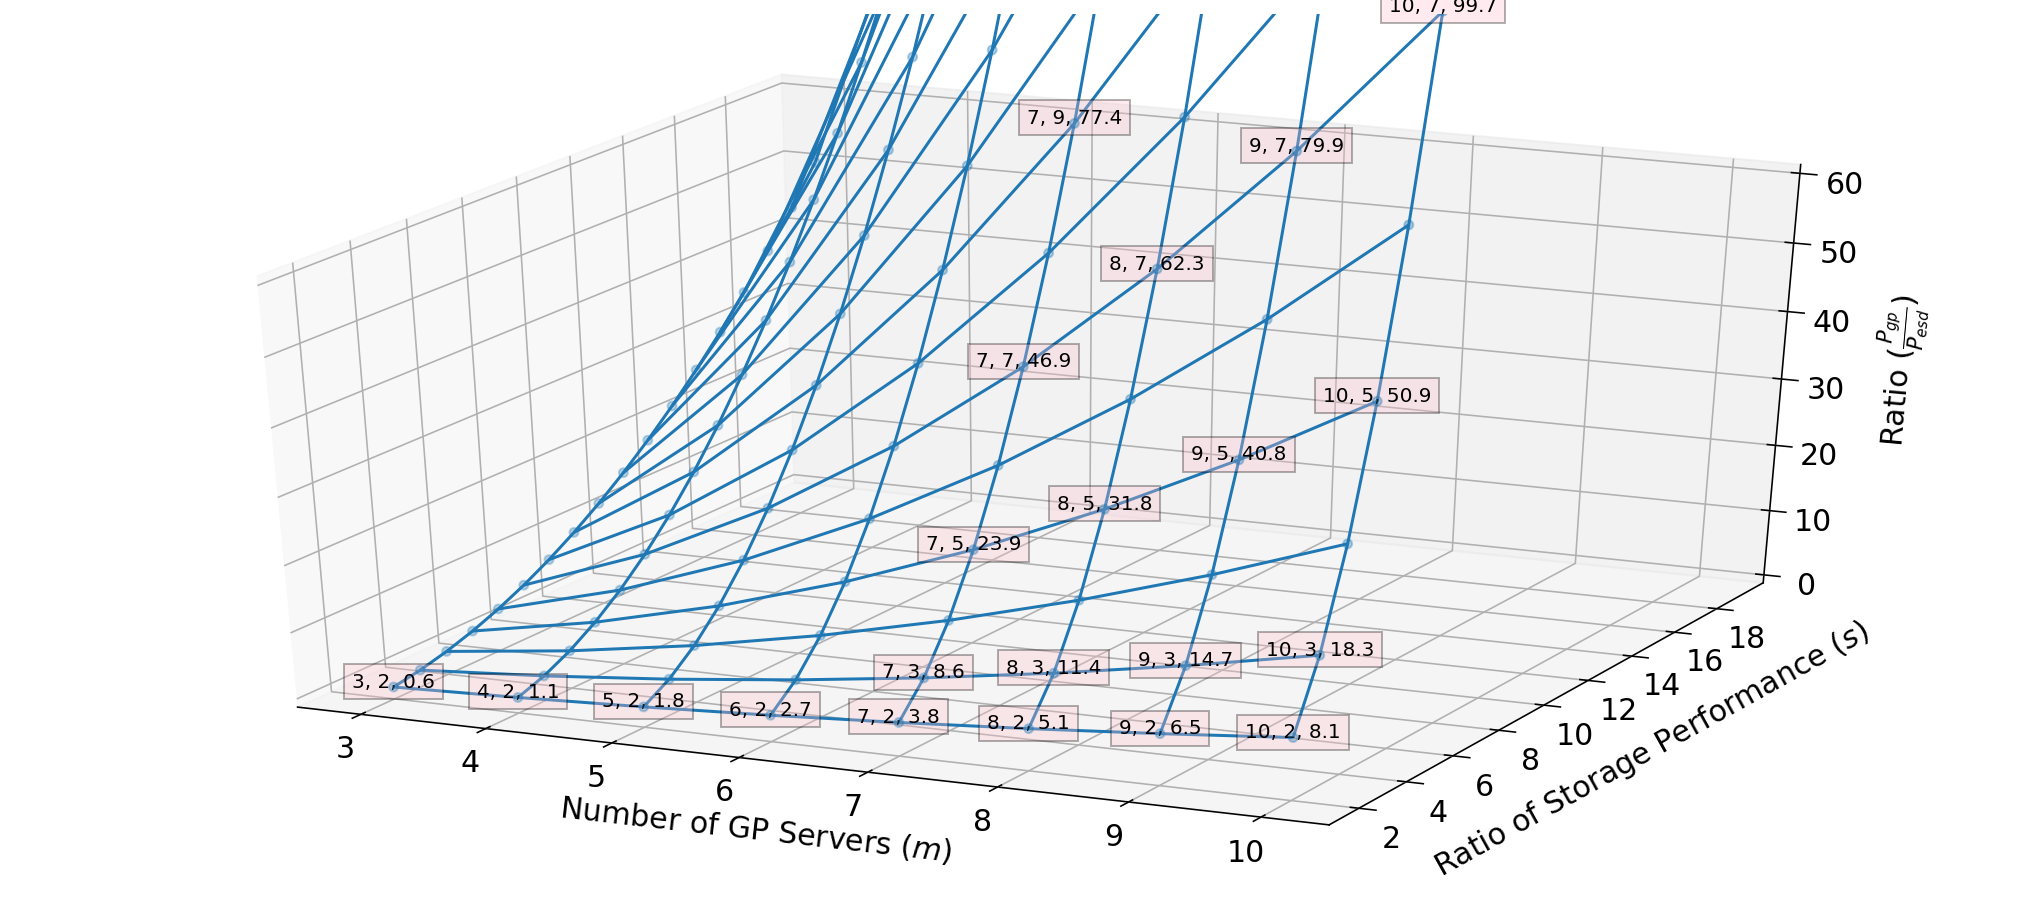

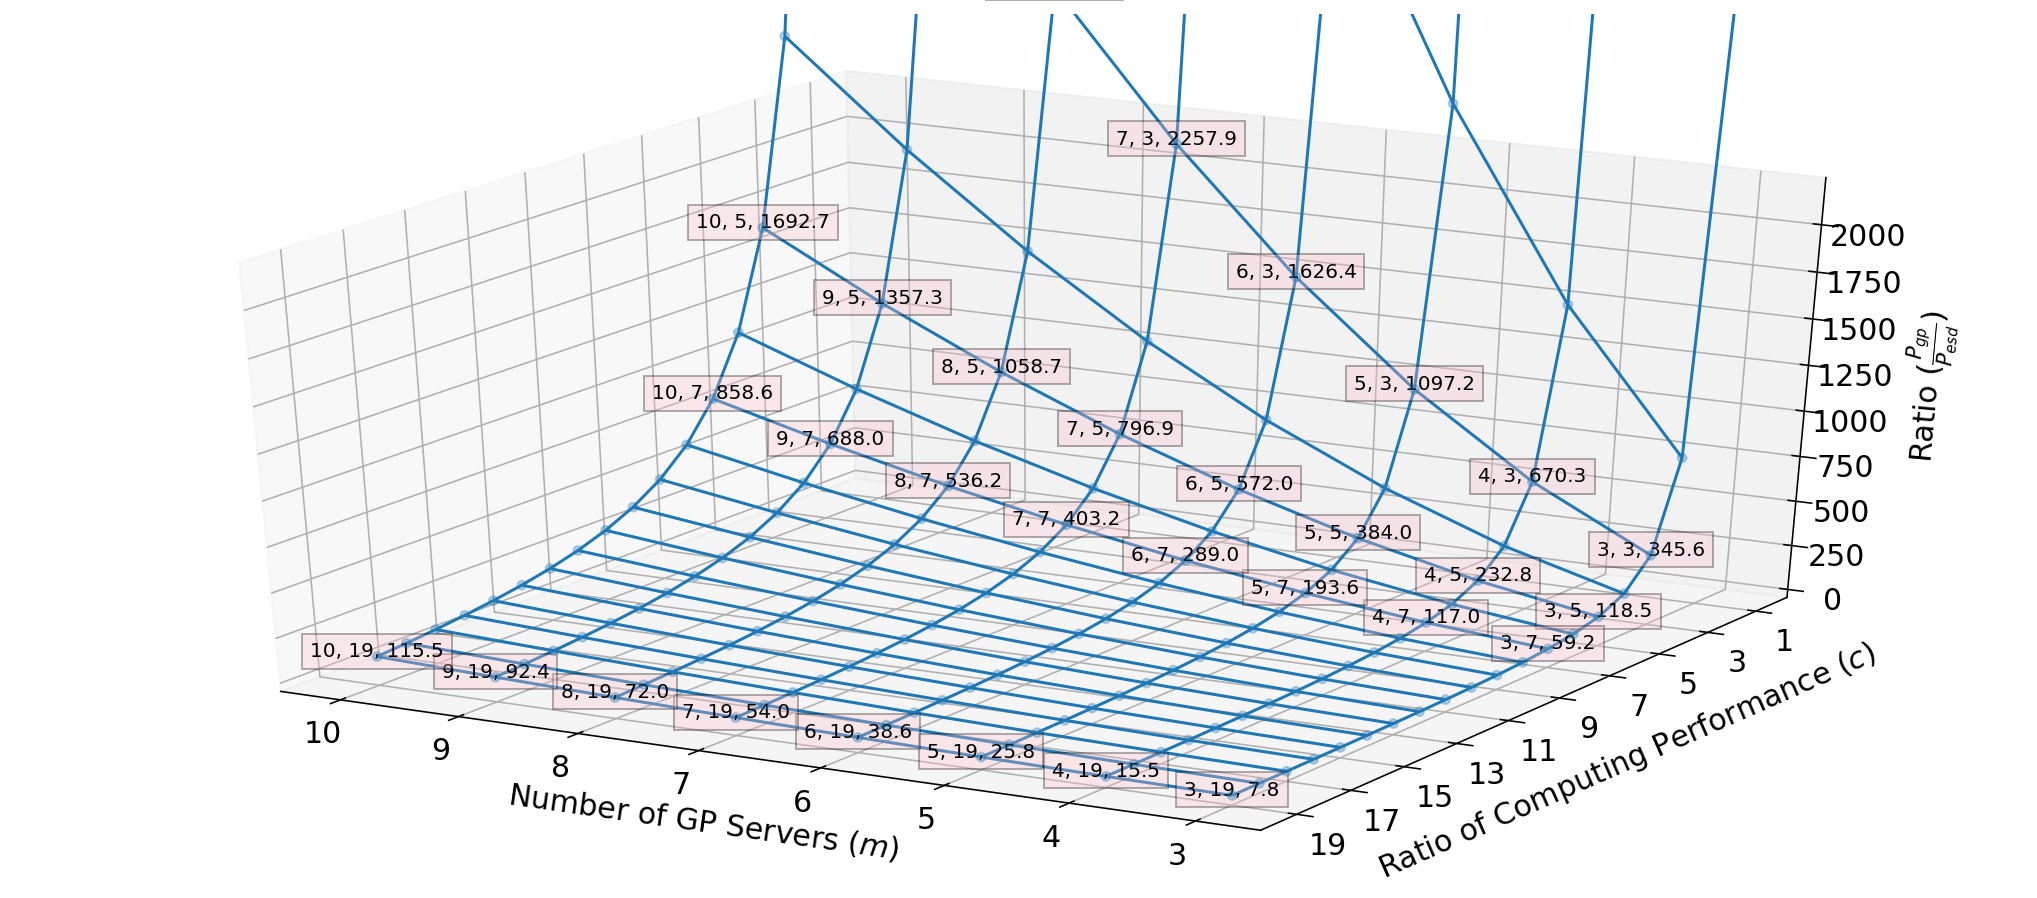

In [4]:
# Vishwanath, Kashi Venkatesh, and Nachiappan Nagappan.
#   "Characterizing cloud computing hardware reliability."
#   Proceedings of the 1st ACM symposium on Cloud computing. 2010.
# => "70% of all server failures is due to hard disks"
f = 2  # for hard drives

plot_m_vs_s(f, [0, 60])
plot_m_vs_c(f, [0, 2200])

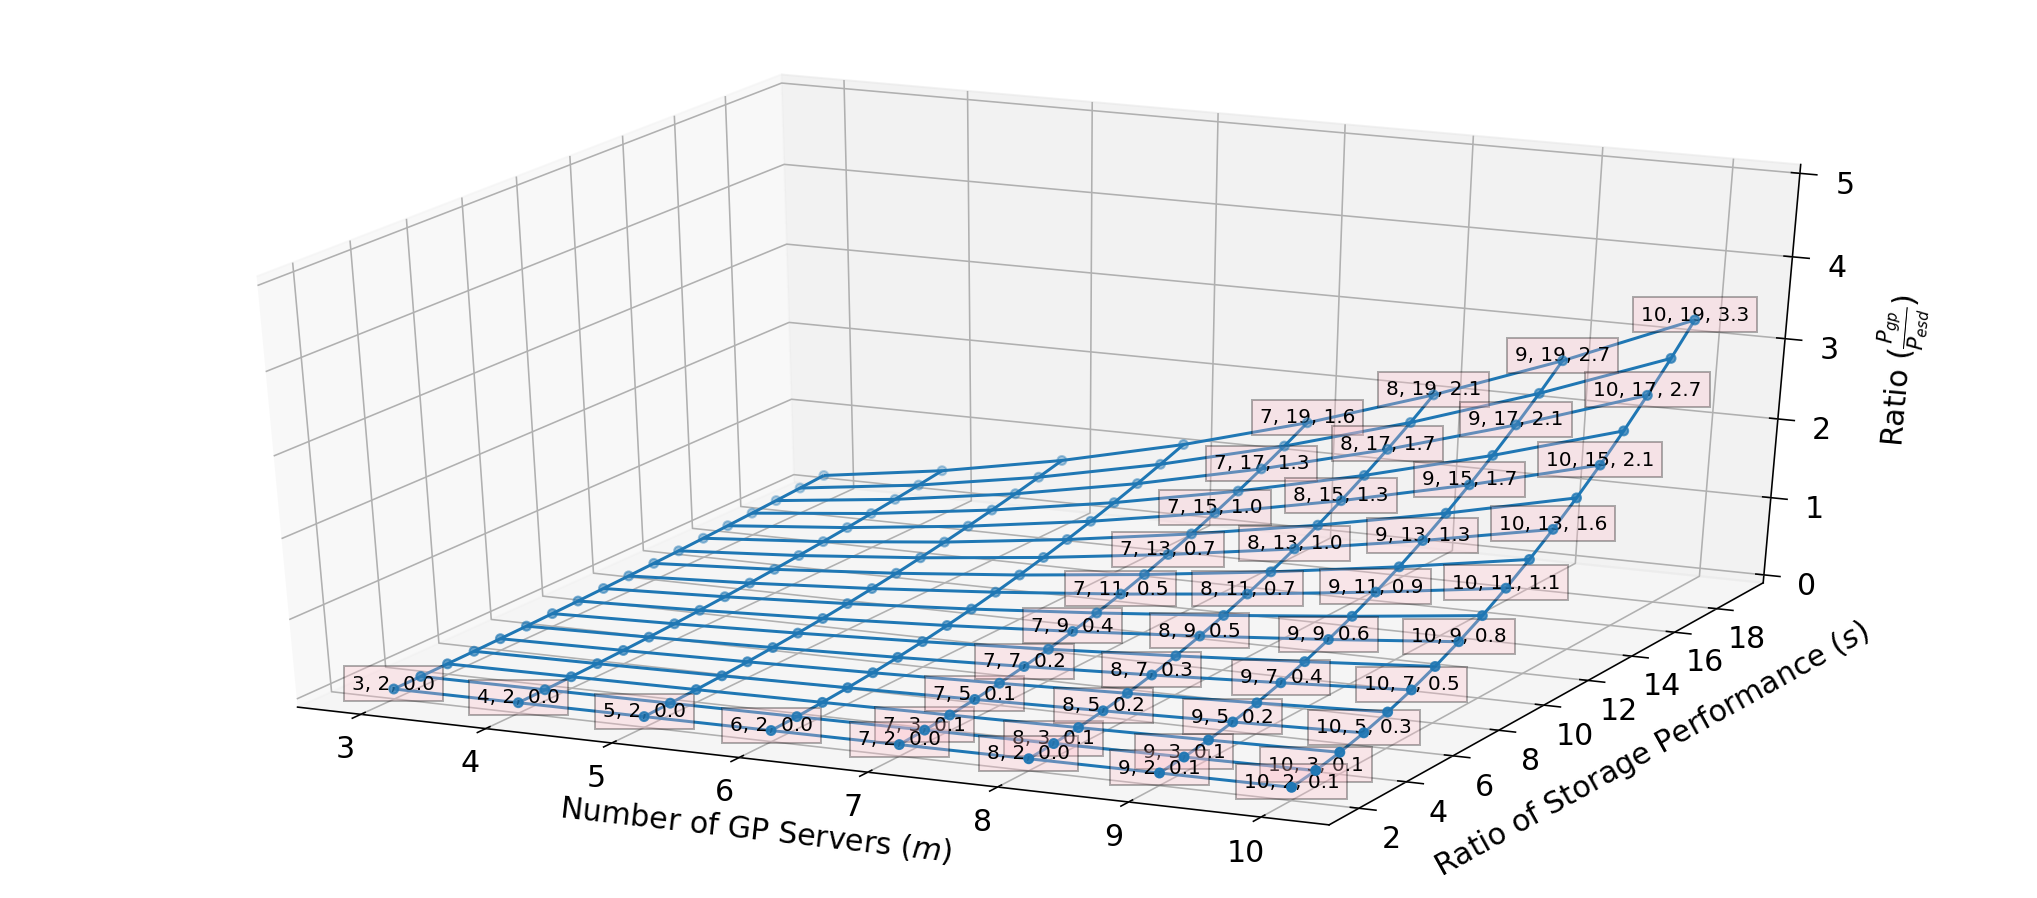

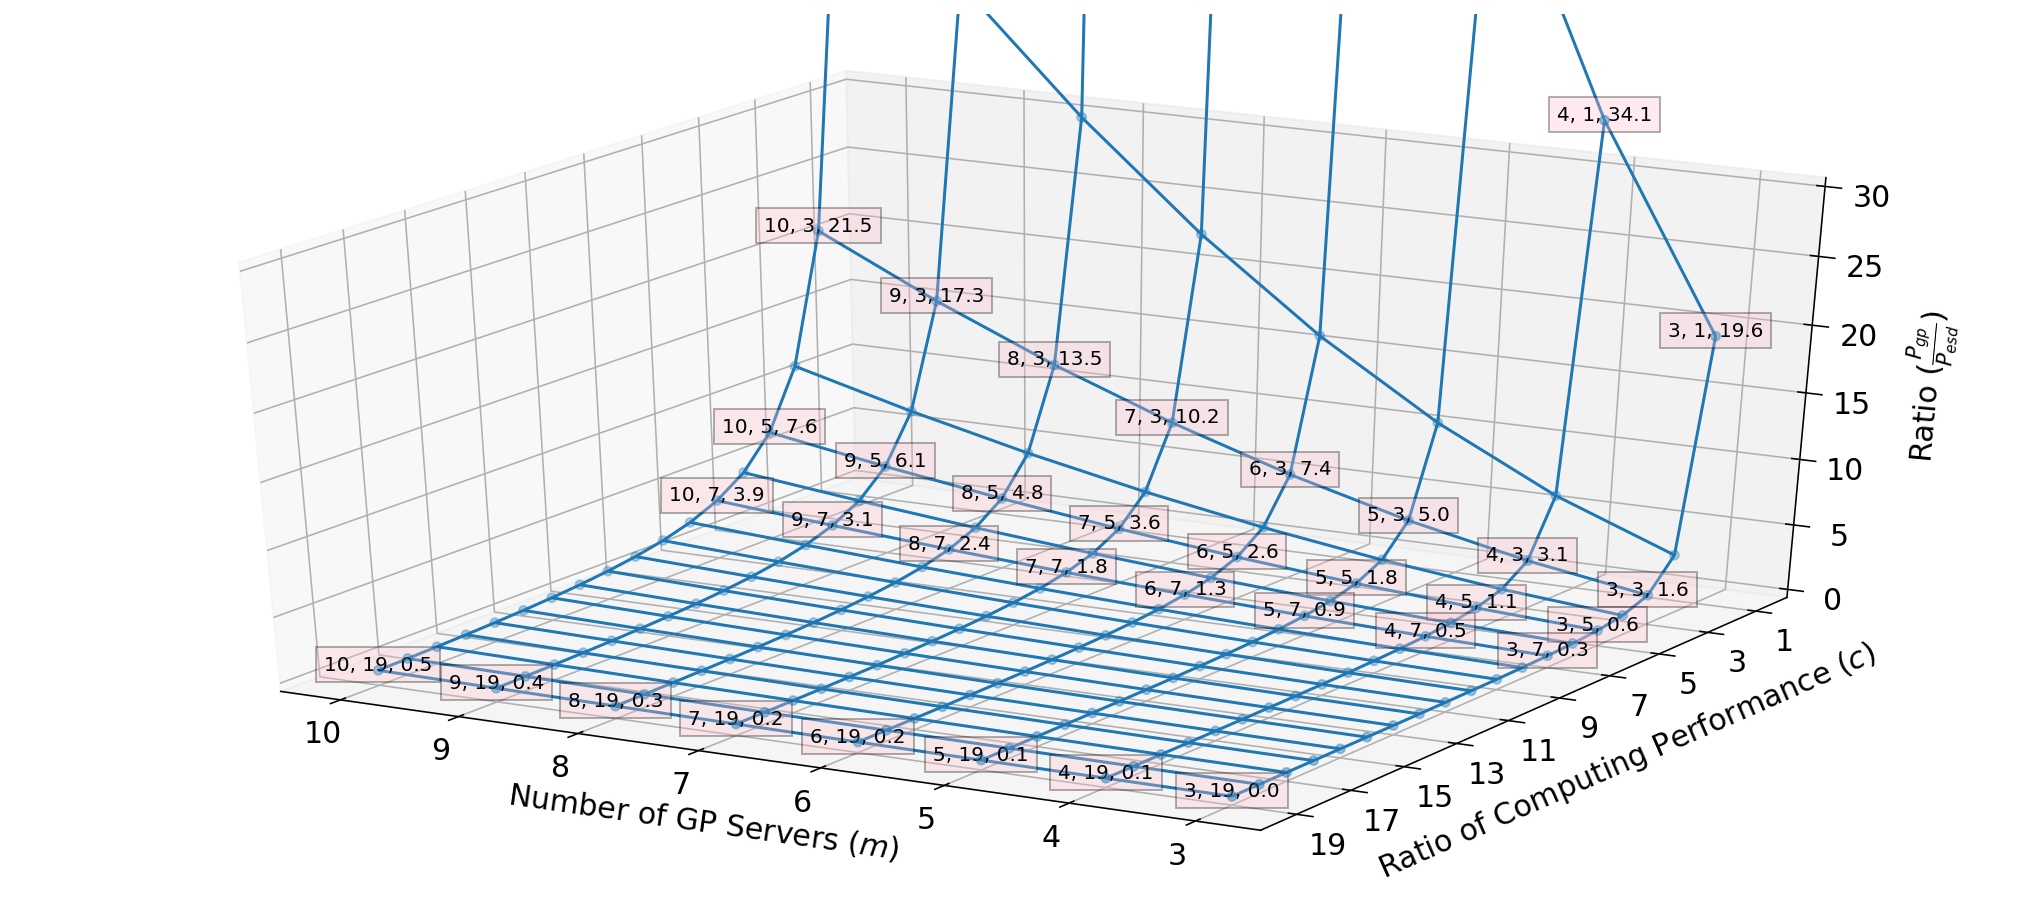

In [5]:
# Xu, Erci, et al.
#   "Lessons and actions: What we learned from 10k ssd-related storage system failures."
#   2019 {USENIX} Annual Technical Conference ({USENIX}{ATC} 19). 2019.
# => SSD-related tickets account for 5.6% of all hardware issues.
f = 0.06  # for SSD

plot_m_vs_s(f, [0, 5])
plot_m_vs_c(f, [0, 30])